<a href="https://colab.research.google.com/github/GuillermoSainz07/Notebooks-DS/blob/main/Deteccion_de_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Definicion del problema

En este ejemplo, la variable de respuesta toma un valor de 1 en caso de que la transaccion dada sea fraude y 0 de los contrario.

El conjunto de datos contienen transacciones con tarjetas de credito. Este conjunto de datos representa las transacciones que ocurrieron en 2 dias, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto esta muy desequilibrado, la clase positiva (fraudes) representa el 0.172% de todas las transacciones. Las caracteristicas con resultados de una transformacion PCA y por ende, no son intuitivas

In [ ]:
!pip install scikit-plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scikitplot.metrics import  plot_roc
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/tatsath/fin-ml/master/Chapter%206%20-%20Sup.%20Learning%20-%20Classification%20models/CaseStudy1%20-%20Fraud%20Detection/creditcard_sample.csv')

In [ ]:
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Analisis exploratorio

In [ ]:
dataset.shape

(99999, 31)

In [ ]:
dataset.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
dataset.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
dataset.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,42432.982130,-0.262096,-0.032374,0.676251,0.162603,-0.278507,0.094066,-0.108712,0.056009,-0.046529,...,-0.030852,-0.109079,-0.037027,0.008982,0.132193,0.026657,0.000606,0.001730,97.962094,0.002230
std,17044.825093,1.859057,1.656854,1.322888,1.349249,1.356376,1.301356,1.210925,1.207528,1.121255,...,0.718882,0.634301,0.632911,0.595255,0.441065,0.494541,0.393700,0.325159,264.624210,0.047171
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33471.500000,-1.028101,-0.598711,0.176781,-0.711442,-0.898645,-0.647870,-0.600209,-0.137457,-0.698812,...,-0.224509,-0.531305,-0.176416,-0.323712,-0.131794,-0.325102,-0.062534,-0.005355,7.570000,0.000000
50%,44299.000000,-0.260556,0.078315,0.753991,0.192567,-0.314370,-0.157022,-0.069107,0.074130,-0.119105,...,-0.057669,-0.083855,-0.049239,0.064999,0.170104,-0.070347,0.009832,0.023318,26.310000,0.000000
75%,55851.000000,1.153327,0.735736,1.376333,1.032416,0.249733,0.486356,0.414667,0.360506,0.558226,...,0.119190,0.308337,0.081522,0.406281,0.419906,0.300683,0.083025,0.076568,89.000000,0.000000
max,67374.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
print(f'Fraude: {sum(dataset.Class)/dataset.shape[0]} %')
print(f'No Fraude: {1 - sum(dataset.Class)/dataset.shape[0]} %')


print(dataset.Class.value_counts().rename(index={0:'No Fraude',
                                                 1:'Fraude'}))

Fraude: 0.002230022300223002 %
No Fraude: 0.997769977699777 %
No Fraude    99776
Fraude         223
Name: Class, dtype: int64


In [ ]:
dataset.Class.value_counts()

0    99776
1      223
Name: Class, dtype: int64

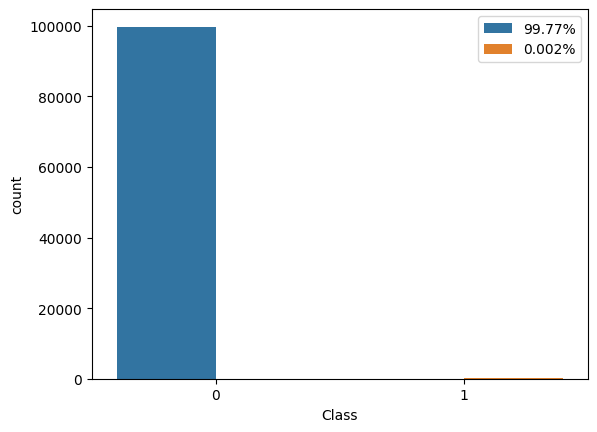

In [ ]:
sns.countplot(x = dataset['Class'], hue = dataset['Class'])
plt.legend(['99.77%',
            '0.002%'])
plt.show()

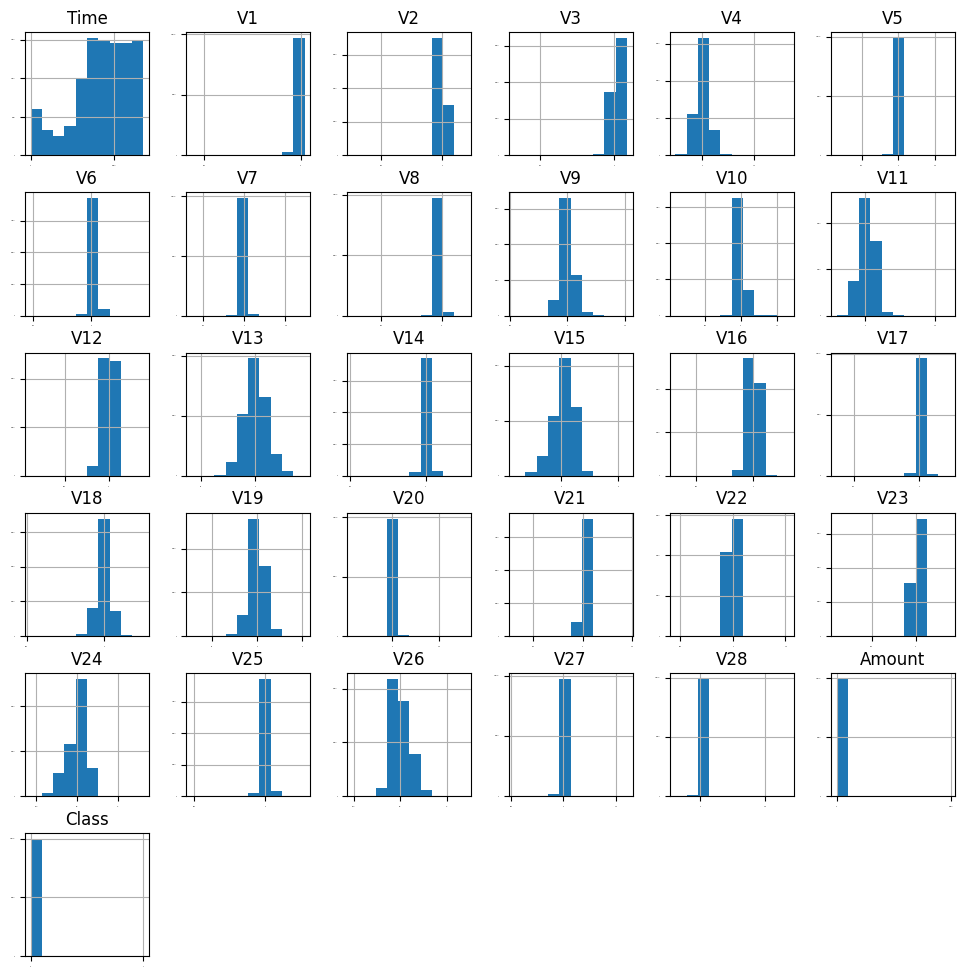

In [ ]:
dataset.hist(xlabelsize=1,ylabelsize=1, figsize=(12,12))
plt.show()

# Seleccion de caracteristicas


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
bestfeatures = SelectKBest(k=10)
y = dataset['Class']
X = dataset.drop('Class', axis=1)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScore = pd.concat([dfcolumns,dfscores], axis=1)
featureScore.columns = ['Specs','Score']
featureScore.nlargest(10,'Score')

,Specs,Score
17,V17,20657.815089
14,V14,16227.609484
3,V3,10383.968697
12,V12,9644.179908
10,V10,7909.706201
16,V16,6829.652688
7,V7,6157.563975
11,V11,3567.597482
4,V4,2840.799746
18,V18,2632.036670


In [ ]:
featureScore.sort_values(by='Score', ascending=False).head(10)

,Specs,Score
17,V17,20657.815089
14,V14,16227.609484
3,V3,10383.968697
12,V12,9644.179908
10,V10,7909.706201
16,V16,6829.652688
7,V7,6157.563975
11,V11,3567.597482
4,V4,2840.799746
18,V18,2632.036670


o alternativamente podriamos hacer (si no nos interesa conocer)


In [ ]:
fit_trans = bestfeatures.fit_transform(X,y)
feature_select = bestfeatures.get_support(indices=True)

print(feature_select) # Variables que se utilizaron
pd.DataFrame(fit_trans)

[ 3  4  7 10 11 12 14 16 17 18]


,0,1,2,3,4,5,6,7,8,9
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195
...,...,...,...,...,...,...,...,...,...,...
99994,0.791165,-1.451021,0.442420,-0.840507,0.942924,1.325765,0.010613,-0.847726,-0.529409,0.560478
99995,0.994155,0.420318,-0.893860,-0.991585,0.703556,0.329566,1.404703,0.583055,-0.323377,0.746467
99996,0.791566,0.425701,-0.476652,-0.577464,-0.803272,-0.059399,-0.194328,-0.313831,0.509424,-0.866048
99997,0.298037,1.890524,-1.498278,-0.967948,-0.895848,1.154300,0.796511,0.294501,0.759053,-0.094365


## Evaluacion de algoritmos y modelos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80,
                                                    random_state=42)


In [ ]:
modelos = {'LR': LogisticRegression(solver='liblinear'),
           'KNN': KNeighborsClassifier(),
           'TC': DecisionTreeClassifier(),
           'RF': RandomForestClassifier(),
           'ET': ExtraTreesClassifier(),
           'GBC': GradientBoostingClassifier()}
results = {}

In [ ]:
for name, model in modelos.items():
  if name == 'KNN':
    pipeline = Pipeline([('scaler',StandardScaler()),
                         (name, model)])

    results[name] = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='recall')
  else:
    results[name] = cross_val_score(model, X_train,y_train, cv=10, scoring='recall')

In [ ]:
print(np.mean(pd.DataFrame(results)))

results_df = pd.DataFrame(results)
results_df

LR     0.495752
KNN    0.805556
TC     0.777778
RF     0.833987
ET     0.822876
GBC    0.693791
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,LR,KNN,TC,RF,ET,GBC
0,0.470588,0.588235,0.588235,0.647059,0.588235,0.529412
1,0.352941,0.764706,0.647059,0.705882,0.705882,0.705882
2,0.611111,0.833333,0.777778,0.833333,0.833333,0.833333
3,0.555556,0.833333,0.777778,0.833333,0.833333,0.833333
4,0.444444,0.888889,0.777778,0.833333,0.833333,0.833333
5,0.500000,0.888889,0.777778,0.888889,0.833333,0.666667
6,0.500000,0.888889,1.000000,1.000000,1.000000,0.833333
7,0.555556,0.888889,0.777778,0.888889,0.888889,0.833333
8,0.555556,0.833333,0.888889,0.944444,0.888889,0.222222
9,0.411765,0.647059,0.764706,0.764706,0.823529,0.647059


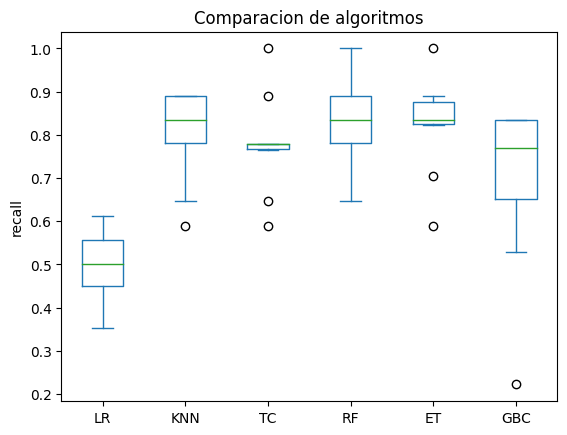

In [ ]:
results_df.plot(kind='box',
                ylabel='recall',title='Comparacion de algoritmos')
plt.show()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

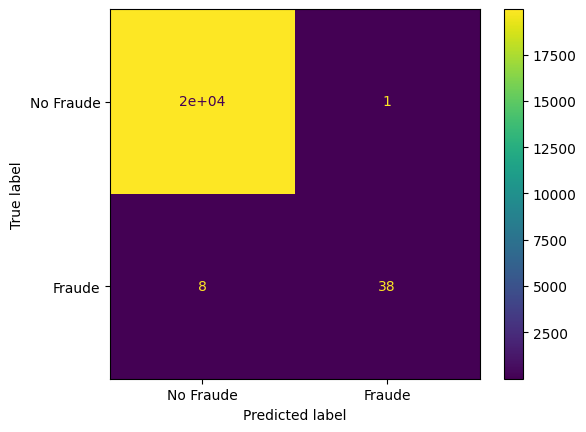

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf, X_test,y_test,
                                      display_labels=['No Fraude', 'Fraude'])
plt.show()

# Tuning y muestras balanceadas

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
x_train_re, y_train_re = sm.fit_resample(X_train,y_train)

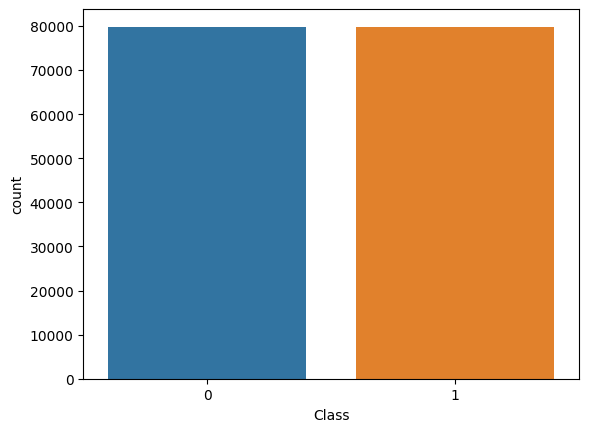

In [ ]:
sns.countplot(x = y_train_re)
plt.show()

In [ ]:
results_resample = {}


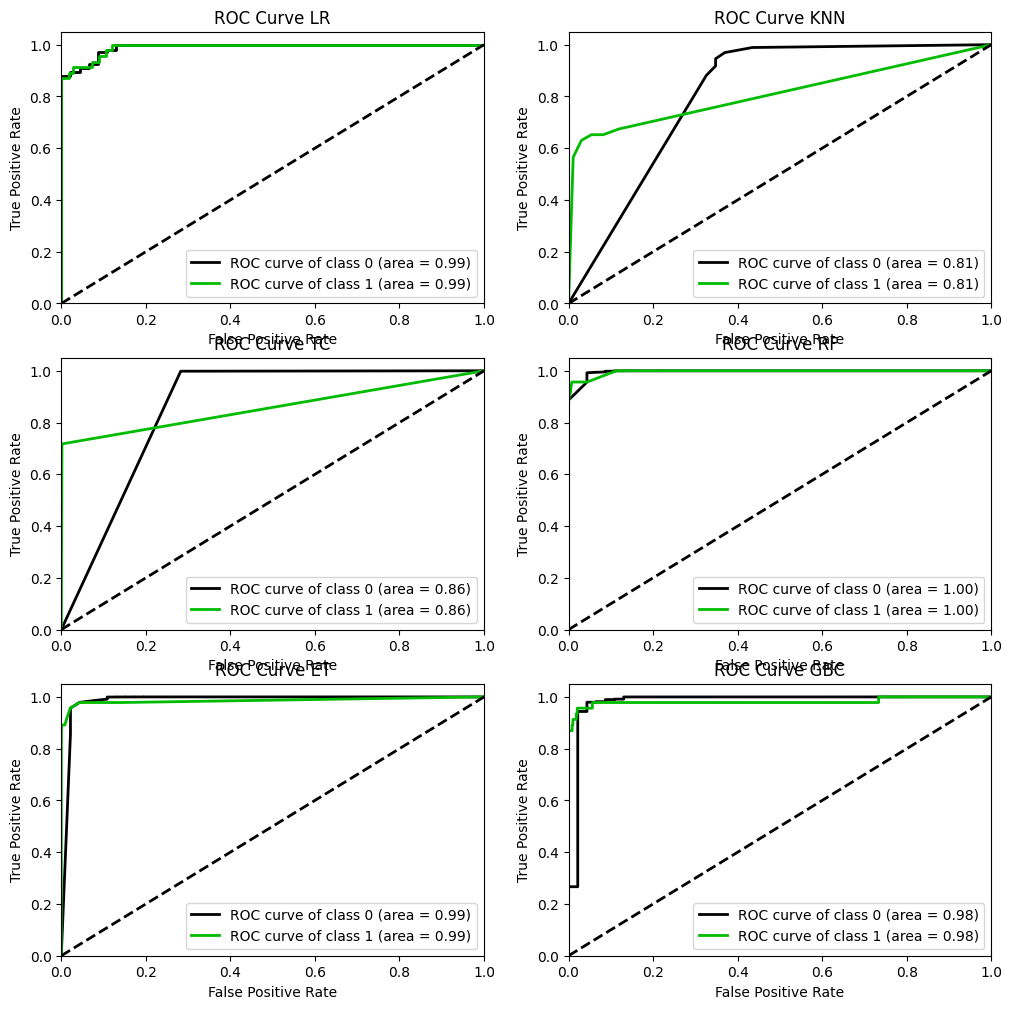

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(12,12))

i = 0
for name, model in modelos.items():
  model.fit(x_train_re, y_train_re)
  results_resample[name] = recall_score(y_test, model.predict(X_test))
  axes = ax[ i // 2, i % 2]
  plot_roc(y_test, model.predict_proba(X_test), ax=axes,
           title=f'ROC Curve {name}',plot_micro=False , plot_macro=False)
  i += 1

In [ ]:
pd.DataFrame(results_resample, index=['Recall'])

,LR,KNN,TC,RF,ET,GBC
Recall,0.869565,0.652174,0.717391,0.847826,0.804348,0.869565


## XGBoost Model

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)

param_grid = {'n_estimators': [100,200,300],
              'scale_pos_weight':[447],
              'max_depth':[2,4,8],
              'learning_rate':[0.1,0.05]}
tuninig = GridSearchCV(xgb_model, param_grid, scoring='roc_auc', cv=3)

In [ ]:
tuninig.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [2, 4, 8],
                         'n_estimators': [100, 200, 300],
                         'scale_pos_weight': [447]},
             scoring='roc_auc')

In [ ]:
tuninig.best_params_

{'learning_rate': 0.05,
 'max_depth': 8,
 'n_estimators': 200,
 'scale_pos_weight': 447}

In [ ]:
tuninig.best_score_

0.9802633945632128

In [ ]:
final_model = xgb.XGBClassifier(n_estimators=700,
                                scale_pos_weight=447,
                                max_depth=8,
                                learning_rate=0.05,
                                early_stopping_rounds=50,
                                eval_metric='aucpr')
final_model.fit(X_train,y_train,
                verbose=100,
                eval_set=[(X_train,y_train),(X_test,y_test)])

[0]	validation_0-aucpr:0.71498	validation_1-aucpr:0.55214
[100]	validation_0-aucpr:0.98968	validation_1-aucpr:0.82960
[200]	validation_0-aucpr:1.00000	validation_1-aucpr:0.88044
[300]	validation_0-aucpr:1.00000	validation_1-aucpr:0.88502
[400]	validation_0-aucpr:1.00000	validation_1-aucpr:0.88607
[500]	validation_0-aucpr:1.00000	validation_1-aucpr:0.88698
[600]	validation_0-aucpr:1.00000	validation_1-aucpr:0.88759
[630]	validation_0-aucpr:1.00000	validation_1-aucpr:0.88732


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=700, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
accuracy_score(y_test, final_model.predict(X_test))

0.9996

In [ ]:
recall_score(y_test,final_model.predict(X_test))

0.8478260869565217

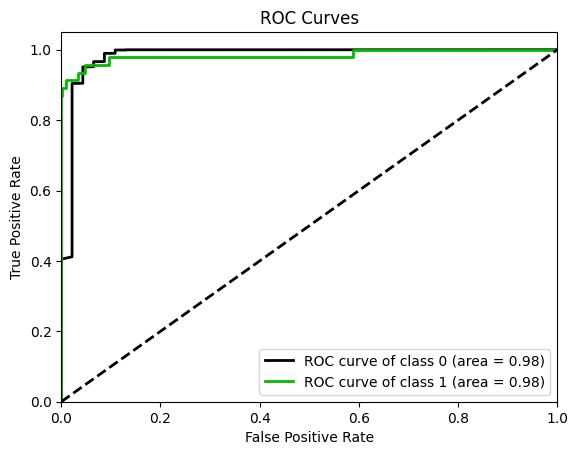

In [ ]:
plot_roc(y_test, final_model.predict_proba(X_test),
         plot_micro=False, plot_macro=False)
plt.show()

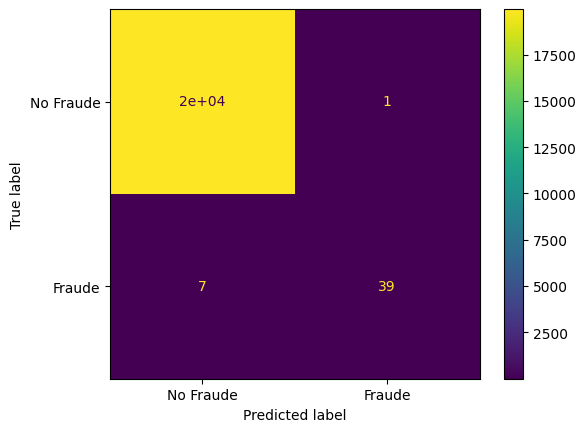

In [ ]:
ConfusionMatrixDisplay.from_estimator(final_model,
                                      X_test,y_test,
                                      display_labels=['No Fraude', 'Fraude'])
plt.show()